In [1]:
from transform import *
from data import *
from model import *
from tools import *
import torch.optim as optim
from tensorboardX import SummaryWriter
from torch.utils.data import Dataset, DataLoader
import warnings
warnings.filterwarnings("ignore")

In [10]:
root1 = '/home/whale/dataset/Landmark/300W'
root2 = '/home/whale/dataset/Landmark/300W_LP'

train1 = os.path.join(root1, "train.xml")
test1 = os.path.join(root1, "test.xml")
train2 = os.path.join(root2, "train.txt")
test2 = os.path.join(root2, "test.txt")
composed = transforms.Compose([CropByLDK(1.4), Flip(), RandomCrop(0.7),Rotate(30), Rescale((64,64)), ToTensor(), Normalize()])


In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
writer = SummaryWriter(log_dir='logs')
#augumentation
trains = []
tests = []
trains.append(Ldk_300W_LP_Dataset(train2, root2, composed))
trains.append(Ldk_300W_Dataset(train1, root1, composed))
    
tests.append(Ldk_300W_LP_Dataset(test2, root2, composed))
tests.append(Ldk_300W_Dataset(test1, root1, composed))

trainset = Dataset_combined(trains)
testset = Dataset_combined(tests)

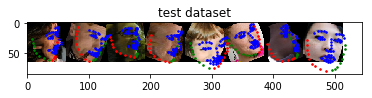

torch.Size([68, 2])


In [35]:
dataloader = DataLoader(trainset, 8, shuffle=True, num_workers=4)
for i_batch,sampled_batch in enumerate(dataloader):
    show_landmarks_batch(sampled_batch)
    print sampled_batch['landmarks'][0].shape
    break